<a href="https://colab.research.google.com/github/farihane-redouan/Basic-machine-learning/blob/main/Basic_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. CREATION DE MON PROPRE MODEL MACHINE LEARNING**

In [248]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

##**1. Dataset**

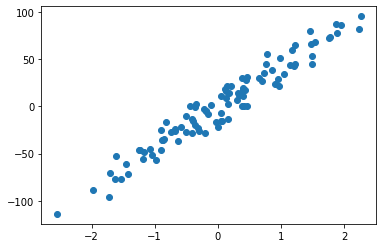

In [249]:
np.random.seed(0) # pour toujours reproduire le meme dataset
x,y=make_regression(n_samples=100,n_features=1,noise=10)
plt.scatter(x,y)

Important: vérifier les dimensions de x et y. On remarque que y n'a pas les dimensions (100, 1). On corrige le probleme avec np.reshape

In [250]:
print(x.shape)
print(y.shape)
y=y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100,)
(100, 1)


Création de la matrice X qui contient la colonne de Biais. Pour ca, on colle l'un contre l'autre le vecteur x et un vecteur 1 (avec np.ones) de dimension égale a celle de x

In [251]:
X=np.hstack((x,np.ones(x.shape)))
print(X.shape)

(100, 2)


Finalement, création d'un vecteur parametre $\theta$, initialisé avec des coefficients aléatoires. Ce vecteur est de dimension (2, 1). Si on désire toujours reproduire le meme vecteur $\theta$, on utilise comme avant np.random.seed(0).

In [252]:
np.random.seed(0)
teta =np.random.randn(2,1)
teta

array([[1.76405235],
       [0.40015721]])

##**2. Modele Linéaire**

In [253]:
def model(data,teta):
  return data.dot(teta)

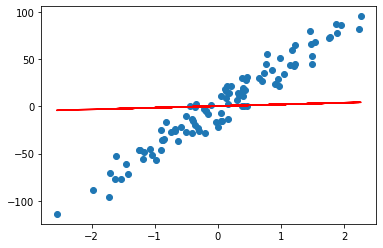

In [254]:
plt.scatter(x,y)
plt.plot(x,model(X,teta), c='r')

## **3. Fonction Cout : Erreur Quadratique moyenne**

On mesure les erreurs du modele sur le Dataset X, y en implémenter l'erreur quadratique moyenne, Mean Squared Error (MSE) .

$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $

Ensuite, on teste notre fonction, pour voir s'il n'y a pas de bug

In [255]:
def Fonction_Cout(x,teta,y):
  m=len(y)
  return (1/2*m)*np.sum(((model(x,teta))-y)**2)

In [256]:
Fonction_Cout(X,teta,y)

9056306.841935502

## **4. Gradients et Descente de Gradient**

On implémente la formule du gradient pour la MSE

$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$

Ensuite on utilise cette fonction dans la descente de gradient:

$\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$

In [258]:
def Gradients(x,teta,y):
  m=len(y)
  return (1/m)*(x.T).dot((model(x,teta))-y)

In [259]:
def Descente_Gradient(x,teta,y,rate,nb_iteration):
  cost_history=np.zeros(nb_iteration)  # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
  for i in range(0,nb_iteration):
    teta=teta-rate*Gradients(x,teta,y) # mise a jour du parametre theta (formule du gradient descent)
    cost_history[i]=Fonction_Cout(x,teta,y) # on enregistre la valeur du Cout au tour i dans cost_history[i]
  return teta,cost_history

## **5. Phase d'entrainement**







On définit un nombre d'itérations, ainsi qu'un pas d'apprentissage $\alpha$.

Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

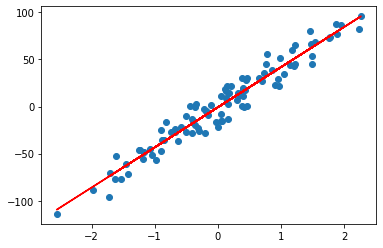

In [260]:
nb_iteration=1000
learning_rate=0.01
teta_final,cost_history=Descente_Gradient(X,teta,y,learning_rate,nb_iteration)
predection=model(X,teta_final)
plt.scatter(x,y)
plt.plot(x,predection,c='r')

## **6. Courbes d'apprentissage**

Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction coût à travers le nombre d'itérations. On cherche à obtenir une courbe qui diminue a chaque itération jusqu'à stagner à un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas **learning_rate** $\alpha$, est peut-être trop élevé, il faut prendre un pas plus petite.


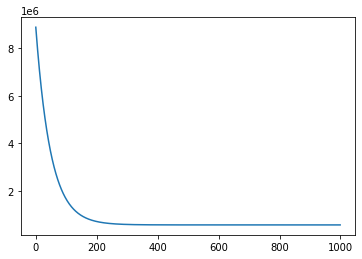

In [261]:
plt.plot(range(nb_iteration),cost_history)

## **7. Evaluation finale**

Pour évaluer la réelle performance de notre modele on peut utiliser le **coefficient de détermination**, aussi connu sous le nom $R^2$. Il nous vient de la méthode des moindres carrés. Plus le résultat est proche de 1,  plus que votre model est le meilleur .

In [262]:
def cof_determination(y,pred):
  a=((y-pred)**2).sum()
  b=((y-y.mean())**2).sum()
  return 1-a/b

In [272]:
cof_determination(y,predection)

0.9417294706504984

# **2. PREMIER MODEL MACHINE LEARNING UTILISANT SGDRegressor**

In [267]:
from sklearn.linear_model import SGDRegressor

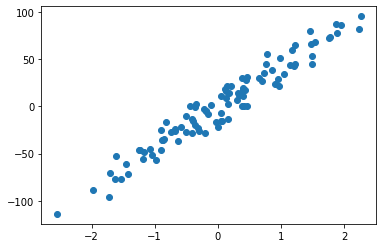

In [268]:
np.random.seed(0)
x_,y_=make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x_,y_)

In [269]:
model_=SGDRegressor(max_iter=10000000,eta0=0.001)
model_.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Coff de determination R= 0.9416567569675361


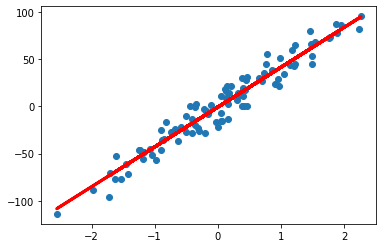

In [271]:
print('Coff de determination R=',model_.score(x_,y_))
plt.scatter(x_,y_)
plt.plot(x_,model_.predict(x_), c='red', lw=3)